## Data Wrangling and EDA


**Introduction**

Millions of people suffer from diabetic retinopathy, the leading cause of blindness among working aged adults. Aravind Eye Hospital in India hopes to detect and prevent this disease among people living in rural areas where medical screening is difficult to conduct. Currently, Aravind technicians travel to these rural areas to capture images and then rely on highly trained doctors to review the images and provide diagnosis. Their goal is to scale their efforts through technology; to gain the ability to automatically screen images for disease and provide information on how severe the condition may be. If successful, these modes will not only help to prevent lifelong blindness, but also be used to detect other sorts of diseases in the future, like glaucoma and macular degeneration.

**Data**

The images are captured by Aravind technicians and reviewed by highly trained doctors. The data is available in Kaggle competition (https://www.kaggle.com/c/aptos2019-blindness-detection/overview)

**Data Science Method**

1.   Problem Identification 

2.   **Data Wrangling** 
 
  * loading and reading data
 
3.   **Exploratory Data Analysis**

  * example images

4.   Pre-processing,Training Data Development and Modeling 

5.   Documentation

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
%matplotlib inline

**Data Loading**

First, open the datasets and match each id with image

In [2]:
path=".../data"
os.chdir(path)

In [5]:
train_dir = os.path.join(path,'train_images/')
df_train = pd.read_csv(os.path.join(path, 'train.csv'))
df_train['path'] = df_train['id_code'].map(lambda x: os.path.join(train_dir,'{}.png'.format(x)))
df_train = df_train.drop(columns=['id_code'])
#print(df_train.head())

test_dir = os.path.join(path,'test_images/')
df_test = pd.read_csv(os.path.join(path, 'test.csv'))
df_test['path'] = df_test['id_code'].map(lambda x: os.path.join(test_dir,'{}.png'.format(x)))
df_test = df_test.drop(columns=['id_code'])

In [ ]:
#train = pd.read_csv("train.csv")
#test = pd.read_csv("test.csv")
#df_train.head()
#df_test.head()

In [6]:
print("There are " + str(len(df_train)) + " train images.")
print("There are " + str(len(df_test)) + " test images.")

There are 3662 train images.
There are 1928 test images.


A clinician has rated each image for the severity of diabetic retinopathy on a scale of 0 to 4: 
- 0 - No DR
- 1 - Mild
- 2 - Moderate
- 3 - Severe
- 4 - Proliferative DR

**Distributions**

Let's see how train image labels are distributed. The data is imbalanced, majority images have a severity scale of 0.

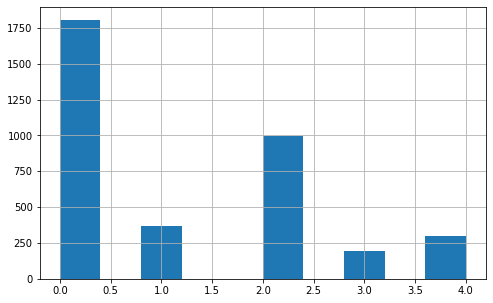

In [7]:
df_train['diagnosis'].hist(figsize = (8, 5))

**Example images**

Let's look at some example images.

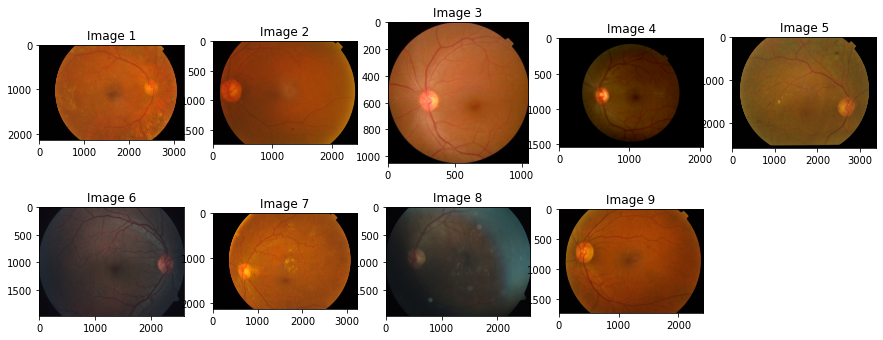

In [8]:
import cv2

count = 1
plt.figure(figsize=[15, 15])

for i in range(1,10):
    img = cv2.imread(df_train['path'][i])[...,[2, 1, 0]]
    plt.subplot(5, 5, count)
    plt.imshow(img)
    plt.title("Image %s" % count)
    count += 1
    
plt.show()